In [2]:
# segmentación de las imágenes
from PIL import Image
import os

def limpiar_carpeta(carpeta):
    for archivo in os.listdir(carpeta):
        ruta_archivo = os.path.join(carpeta, archivo)
        if os.path.isfile(ruta_archivo):
            os.remove(ruta_archivo)

def dividir_imagen(imagen, ancho_segmento, alto_segmento, carpeta_destino):
    if not os.path.exists(carpeta_destino):
        os.makedirs(carpeta_destino)
    else:
        limpiar_carpeta(carpeta_destino)

    img = Image.open(imagen)
    ancho_total, alto_total = img.size

    contador = 1
    for y in range(0, alto_total, alto_segmento):
        for x in range(0, ancho_total, ancho_segmento):
            cuadro = (x, y, x + ancho_segmento, y + alto_segmento)
            segmento = img.crop(cuadro)
            segmento.save(os.path.join(carpeta_destino, f"segmento_{contador}.png"))
            contador += 1


imagen_original = "17.jpg"
ancho_segmento = 100
alto_segmento = 100
carpeta_destino = "segmentos"

dividir_imagen(imagen_original, ancho_segmento, alto_segmento, carpeta_destino)


In [9]:
# SIFT

# Important NOTE:  Use opencv >=4.4 
import cv2
 
# Loading the image
img = cv2.imread('animales/full32_11.jpg')
 
 # Converting image to grisscale
gris= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
# Applying SIFT detector
sift = cv2.SIFT_create()
# kp = sift.detect(gris, None)
kp, des = sift.detectAndCompute(gris,None)
print(des)  #5120

# kp,des = sift.compute(gris,kp)
# print(kp,des)


# Marking the keypoint on the image using circles
img=cv2.drawKeypoints(gris ,
                      kp ,
                      img ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
cv2.imwrite('image-with-keypoints.jpg', img)

[[ 23.  22.   4. ...   0.   0.   0.]
 [165.  78.   4. ...   2.   0.   0.]
 [  2.  10.   3. ...  36.  12.  37.]
 ...
 [  0.   0.   0. ...   2.   1.  31.]
 [ 26.  90.  29. ...  11.  15.   2.]
 [  2.  10.   6. ... 133.  38.  64.]]


True

[[204  34  17 240 200 237  73  24 167  54  35 153 150 135  73  95   5 144
  111 154  58  22 218  82 213 144   1 108 178 209   6  98]
 [116 253 188 178 236  45  87 252 130 191 189  31  87 127  75  27 157 211
  109 115  56  99 218  34 253 135 109 125 160 123 134  83]
 [146 205  69 234  26 194  11 173  55   5 203 162 121  71  40  84  94 177
  139 240  58 139  77 127 249 164 139  73  53 130 164  32]
 [  1 137  55  91 172 251 160 199 204  81 186  80 178  24 188 171 200   2
   90  17 151 169 119  53   1 154  26  82 217   8 217 172]
 [116  46 236  32 141 123  69 139 227 255 190 153   3  45  87  27 137 196
  237  61  60 105 231   0 219  83  85 125 227 253 222  70]
 [ 67 177 173 186 170 217  41  77 174  93 141 168 180 182 202 126 167  27
  120 145  19  73 254 113 141   6 126 234 136   2 167 125]
 [241 156  31  28  48 202  83  34 180 204 230 173 247 246 162 113  64  36
  108  38 109 205 113  47 217 163  97  17 104  40   6 123]
 [177  44 124  92  76 123  85 111 241 150 164  24  99  32 135  59  41

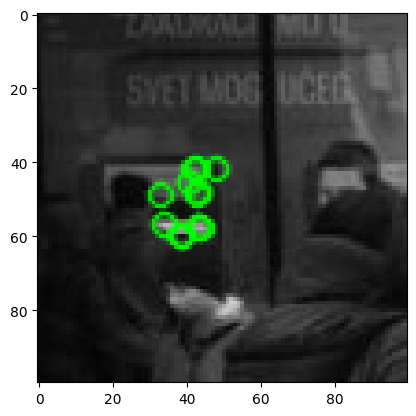

(<matplotlib.image.AxesImage at 0x2b417db1c90>, None)

In [9]:
# ORB
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('segmentos\segmento_21.png', cv.IMREAD_grisSCALE)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptores with ORB
kp, des = orb.compute(img, kp)

print(des)     #576

# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

Number of contours detected: 3

HuMoments for Contour 1:
 [[3.11386459e-01]
 [6.04324353e-02]
 [2.32620095e-03]
 [3.18878052e-04]
 [2.73757814e-07]
 [7.63192873e-05]
 [2.19696593e-08]]

HuMoments for Contour 2:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

HuMoments for Contour 3:
 [[ 2.50000000e-01]
 [ 3.47222222e-02]
 [ 1.27870232e-20]
 [ 1.12910671e-20]
 [ 1.28739962e-40]
 [ 1.21388324e-21]
 [-4.28095519e-41]]


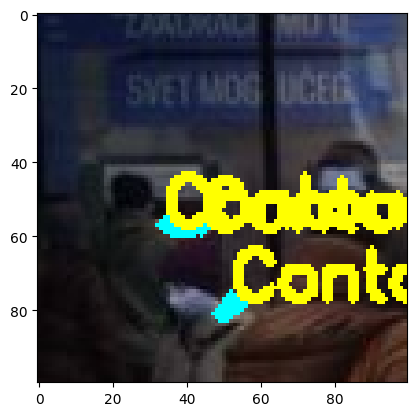

(<matplotlib.image.AxesImage at 0x28c8854ec50>, None)

In [7]:
# Momentos de HUGH

import cv2
import numpy as np

img = cv2.imread('segmentos\segmento_21.png')
gris = cv2.cvtColor(img, cv2.COLOR_BGR2gris)
ret,thresh = cv2.threshold(gris,170,255,0)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print("Number of contours detected:",len(contours))

# compute momentos_hu for all the contours detected in the image
for i, cnt in enumerate(contours):
   x,y = cnt[0,0]
   moments = cv2.moments(cnt)
   hm = cv2.momentos_hu(moments)
   cv2.drawContours(img, [cnt], -1, (0,255,255), 3)
   cv2.putText(img, f'Contour {i+1}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
   print(f"\nmomentos_hu for Contour {i+1}:\n", hm)   # 27

plt.imshow(img), plt.show()


In [11]:
# ORB 2

import cv2  # La única librería que necesitaremos es OpenCV
 
# Cargamos una imagen de prueba y la mostramos en pantalla.
image = cv2.imread('segmentos\segmento_21.png')
cv2.imshow('Off road SUV', image)
cv2.waitKey(0)
 
# Convertimos la imagen a escala de grises, puesto que es un prerrequisito para usar descriptores binarios.
gris = cv2.cvtColor(image, cv2.COLOR_BGR2gris)
 
# Instanciamos ORB, el cual nos da los puntos clave así como los descriptores binarios.
detector = cv2.ORB_create()
keypoints, descriptores = detector.detectAndCompute(gris, None)
 
# Imprimimos el número de puntos clave hallados, así como las dimensiones del vector de features.
print(f'Número de puntos clave detectados.: {len(keypoints)}')
print(f'Dimensiones del vector de features: {descriptores.shape}')
print(keypoints)
print(descriptores)

Número de puntos clave detectados.: 11
Dimensiones del vector de features: (11, 32)
(< cv2.KeyPoint 000002B4176D2760>, < cv2.KeyPoint 000002B4176D2190>, < cv2.KeyPoint 000002B417EEE190>, < cv2.KeyPoint 000002B417EEED00>, < cv2.KeyPoint 000002B417EEE160>, < cv2.KeyPoint 000002B417EEDE30>, < cv2.KeyPoint 000002B417EEE5E0>, < cv2.KeyPoint 000002B417EEEE20>, < cv2.KeyPoint 000002B417EEDE60>, < cv2.KeyPoint 000002B417EEF390>, < cv2.KeyPoint 000002B417EEE940>)
[[204  38  17 240 200 237  73  24 167  54  35 217 150 135  73  95   5 144
  111 154  58  20 218  82 213 144   1 108 178 209   6  98]
 [116 245 188 178 236  45  87 252 130 183 189  31  87 127  75  27 157 215
  109 115  56  99 218  34 253 131 109 125 160 123 134  83]
 [146 205  69 234  26 194  11 173  55   5 203 162 105  71  40  84  94 177
  139 240  58 139  77 127 249 164 139  73  53 130 164  32]
 [  1 137  55  91 172 255 160 199 204  81 250  80 176  24 188 171 200   3
   90  17 151 169 119  53   1 154  26  82 217   8 217 172]
 [118  46

In [22]:
# Momemntos de Hu

import cv2
import matplotlib as plt
import math

# Cargar la imagen en escala de grises
imagen = cv2.imread('segmentos\segmento_21.png', cv2.IMREAD_grisSCALE)

_,imagen = cv2.threshold(imagen, 128, 255, cv2.THRESH_BINARY)

# Calcular momentos
moments = cv2.moments(imagen) 

# Calcular momentos de Hu
momentos_hu = cv2.momentos_hu(moments)

# print(momentos_hu)

# Para "normalizarlos"
for i in range(0,7):
   momentos_hu[i] = -1* math.copysign(1.0, momentos_hu[i]) *math. log10(abs(momentos_hu[i]))

print(momentos_hu)


[[ 1.51721476]
 [ 3.28567286]
 [ 4.7082185 ]
 [ 5.07142955]
 [ 9.96136348]
 [ 6.71439399]
 [11.60918909]]


c:\Users\chj06\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chj06\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chj06\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chj06\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

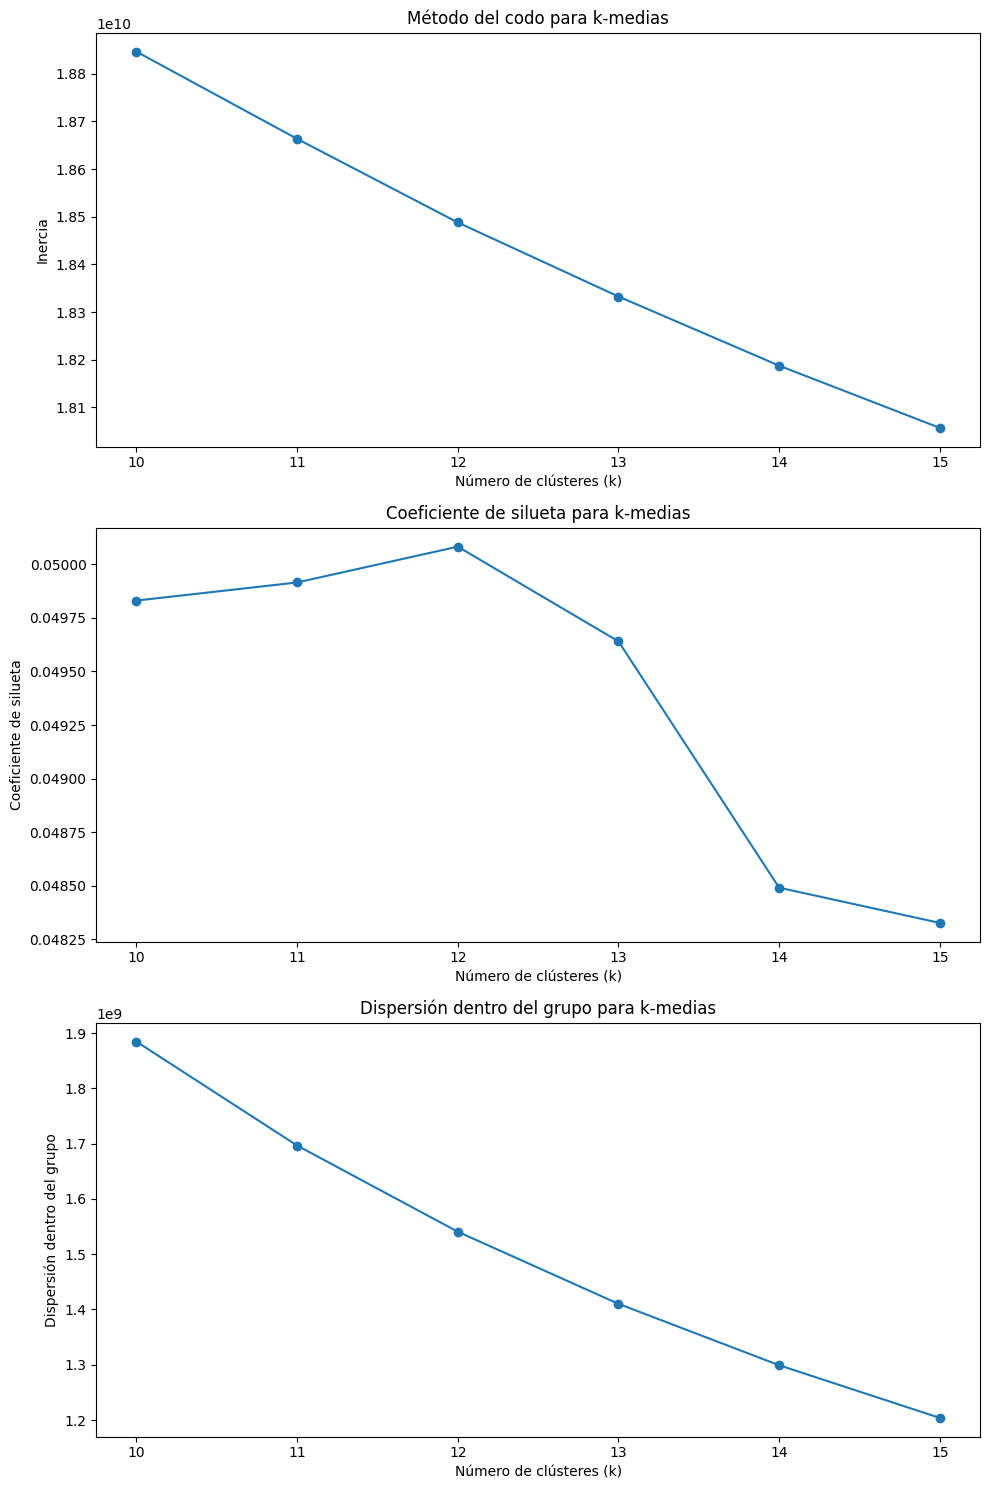

c:\Users\chj06\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chj06\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chj06\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chj06\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

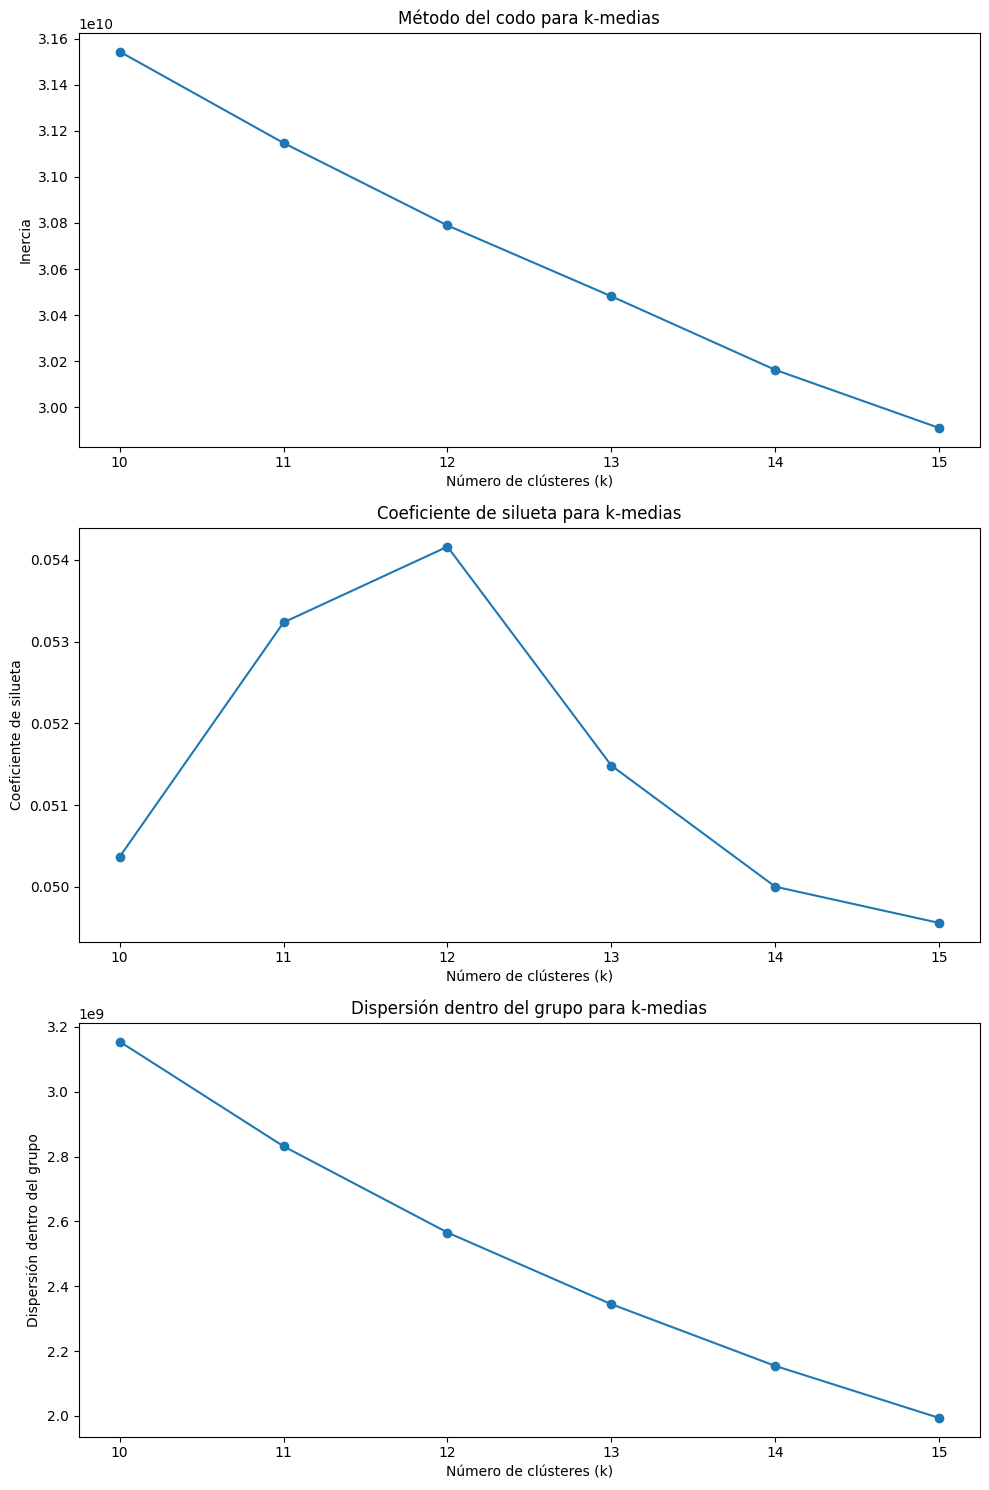

c:\Users\chj06\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chj06\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chj06\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\chj06\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

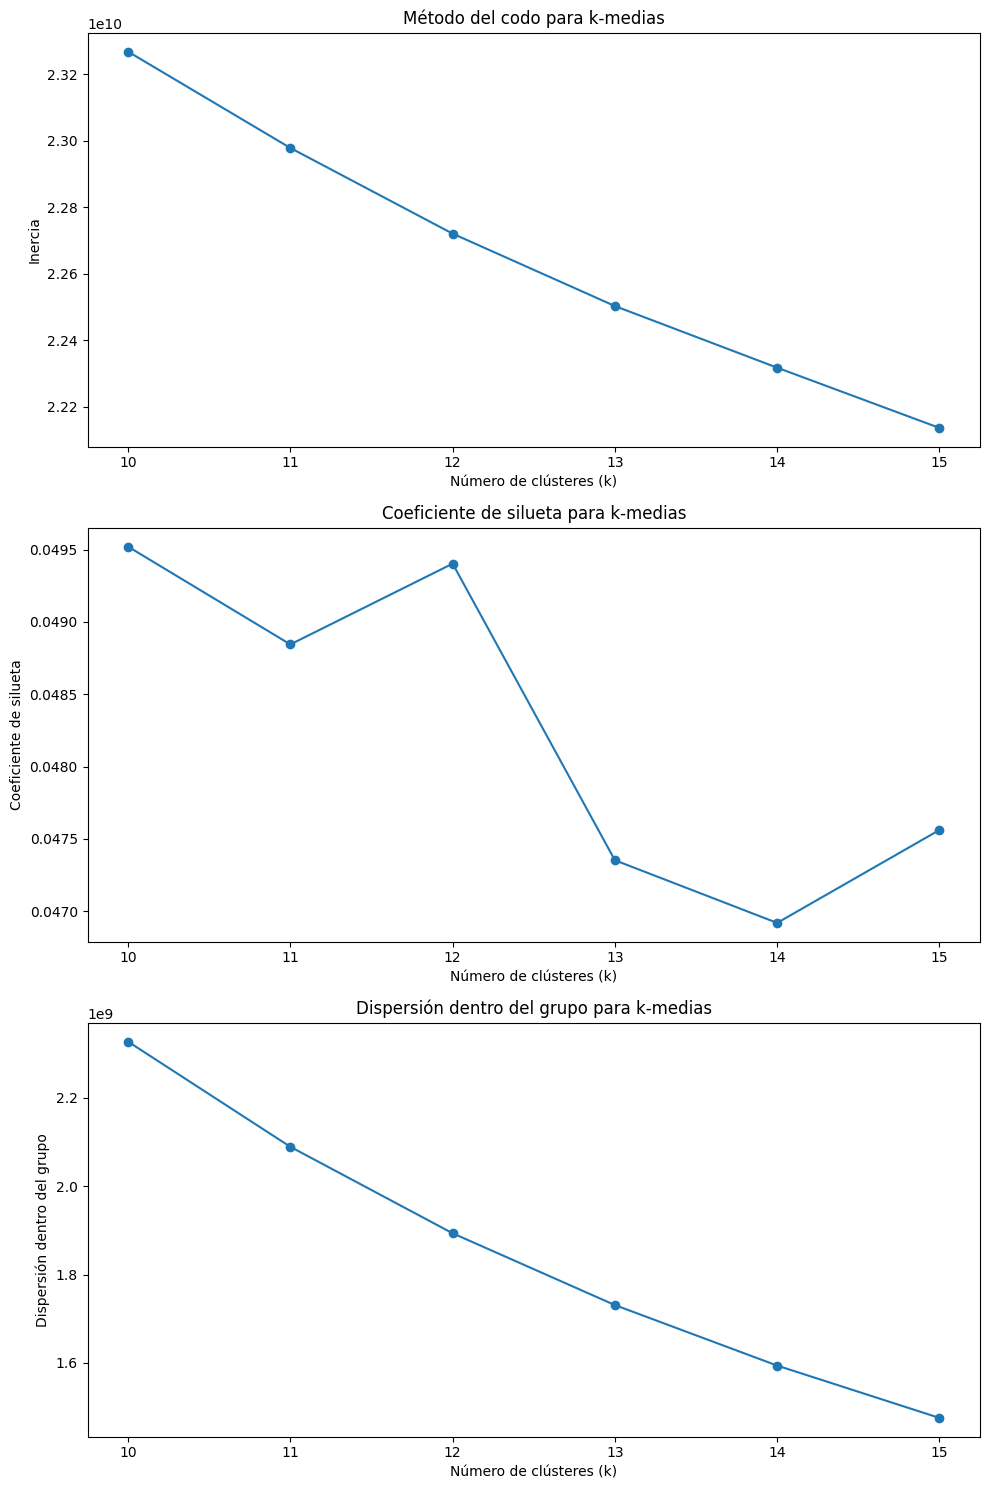

c:\Users\chj06\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


FileNotFoundError: [Errno 2] No such file or directory: 'descriptores/descriptores_completos_normalizados.csv'

In [1]:
import cv2
import os
import math
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import silhouette_score
import csv
import matplotlib.pyplot as plt

def encontrarDescriptores(ruta_imagen, detector):
    img = cv2.imread(ruta_imagen)
    gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    keypoints, descriptores = detector.detectAndCompute(gris, None)
    return keypoints, descriptores

def momentosHu(ruta_imagen):
    imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    _, imagen = cv2.threshold(imagen, 128, 255, cv2.THRESH_BINARY)
    moments = cv2.moments(imagen)
    momentos_hu = cv2.HuMoments(moments)
    for i in range(0, 7):
        if momentos_hu[i] <= 0:
            momentos_hu[i] = 0.0
        else:
            momentos_hu[i] = -1 * math.copysign(1.0, momentos_hu[i]) * math.log10(abs(momentos_hu[i]))
    return momentos_hu

def extraerDescriptoresGlobal(ruta_folder, detector):
    descriptores_global = []
    ruta_imagenes = []
    for nombre_imagen in os.listdir(ruta_folder):
        ruta_imagen = os.path.join(ruta_folder, nombre_imagen)
        keypoints, descriptores = encontrarDescriptores(ruta_imagen, detector)
        momentos_hu = momentosHu(ruta_imagen)
        if descriptores is not None:
            descriptores_global.extend(descriptores)
            ruta_imagenes.append(ruta_imagen)
    return np.array(descriptores_global), ruta_imagenes

def calcularHistograma(ruta_imagen, detector, kmedias):
    keypoints, descriptores = encontrarDescriptores(ruta_imagen, detector)
    if descriptores is None:
        return None
    else:
        palabras_visuales = kmedias.predict(descriptores)
        histograma, _ = np.histogram(palabras_visuales, bins=range(kmedias.n_clusters + 1))
        return histograma

def normalizarCaracteristicas(caracteristicas):
    min_vals = np.min(caracteristicas, axis=0)
    max_vals = np.max(caracteristicas, axis=0)
    normalizacion = (caracteristicas - min_vals) / (max_vals - min_vals)
    return normalizacion

def main(ruta_folders, csv_file):
    detector = cv2.SIFT_create()
    descriptores_globales = []
    etiquetas_globales = []

    for etiqueta, ruta_folder in enumerate(ruta_folders, start=0):
        descriptores_global, ruta_imagenes = extraerDescriptoresGlobal(ruta_folder, detector)

        # Método del codo para encontrar el mejor k
        inertias = []
        siluetas = []
        dispersiones = []
        min_clusters = 10
        max_clusters = 15  # Define el rango de clústeres que deseas probar
        ks = range(min_clusters, max_clusters + 1)  # Prueba k desde min_clusters hasta max_clusters
        for k in ks:
            kmedias = KMeans(n_clusters=k)
            kmedias.fit(descriptores_global)
            inertias.append(kmedias.inertia_)
            siluetas.append(silhouette_score(descriptores_global, kmedias.labels_))
            dispersiones.append(kmedias.inertia_ / k)  # Inercia dividida por el número de clústeres
        # Graficar las métricas en función de k
        fig, axs = plt.subplots(3, figsize=(10, 15))

        axs[0].plot(ks, inertias, '-o')
        axs[0].set_xlabel('Número de clústeres (k)')
        axs[0].set_ylabel('Inercia')
        axs[0].set_title('Método del codo para k-medias')

        axs[1].plot(ks, siluetas, '-o')
        axs[1].set_xlabel('Número de clústeres (k)')
        axs[1].set_ylabel('Coeficiente de silueta')
        axs[1].set_title('Coeficiente de silueta para k-medias')

        axs[2].plot(ks, dispersiones, '-o')
        axs[2].set_xlabel('Número de clústeres (k)')
        axs[2].set_ylabel('Dispersión dentro del grupo')
        axs[2].set_title('Dispersión dentro del grupo para k-medias')

        plt.tight_layout()
        plt.show()
        
        # Clusters de características
        kmedias = KMeans(n_clusters=13)
        kmedias.fit(descriptores_global)

        descriptores_finales = []

        for ruta_imagen in ruta_imagenes:
            histograma = calcularHistograma(ruta_imagen, detector, kmedias)
            if histograma is not None:
                momentos_hu = momentosHu(ruta_imagen)
                momentos_hu_flat = momentos_hu.flatten()  # Convertir a unidimensional

                # Calcular histogramas TF-IDF
                transformer = TfidfTransformer()
                histograma_tfidf = transformer.fit_transform([histograma]).toarray()[0]

                # Juntar momentos de Hu con histogramas TF-IDF
                descriptores_combinados = np.concatenate((momentos_hu_flat, histograma))
                descriptores_finales.append(descriptores_combinados)
                etiquetas_globales.append(etiqueta)

        descriptores_globales.extend(descriptores_finales)

    # Normaliza las características
    normalizacion = normalizarCaracteristicas(np.array(descriptores_globales))

    # Se crea el archivo CSV
    with open(csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        for descriptor, label in zip(normalizacion, etiquetas_globales):
            writer.writerow(list(map(str, descriptor)) + [label])

# 0 - animales
# 1 - ciudad
# 2 - personas

# Define las carpetas y etiquetas
ruta_folders = ["../etiquetado_800/animales", "../etiquetado_800/ciudad", "../etiquetado_800/personas"]
csv_file = "../descriptores/descriptores_completos_normalizados.csv"

# Ejecuta la función principal
main(ruta_folders, csv_file)
